In [6]:
import requests
import zipfile
import io
import pandas as pd

# URL del dataset en Kaggle
url = "https://www.kaggle.com/api/v1/datasets/download/wmcginn/sp500-csv"

# Descargar el zip
response = requests.get(url, allow_redirects=True)

if response.status_code == 200:
    print("✅ Descarga completada")

    # Abrir el zip desde memoria
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
        print("Archivos en el zip:", zip_file.namelist())

        # Filtrar archivos CSV
        csv_files = [name for name in zip_file.namelist() if name.endswith(".csv")]

        if len(csv_files) >= 3:
            print("✅ Se encontraron al menos 3 CSVs")

            # Leer cada CSV en variables separadas
            dfprices = pd.read_csv(zip_file.open(csv_files[0]))
            dfreturns = pd.read_csv(zip_file.open(csv_files[1]))
            dftickerlist = pd.read_csv(zip_file.open(csv_files[2]))

            print("Formas de los DataFrames:")
            print("dfprices:", dfprices.shape)
            print("dfreturns:", dfreturns.shape)
            print("dftickerlist:", dftickerlist.shape)
        else:
            print("❌ No hay suficientes CSVs en el zip")
else:
    print("❌ Error en la descarga:", response.status_code)


✅ Descarga completada
Archivos en el zip: ['prices.csv', 'returns.csv', 'tickerlist.csv']
✅ Se encontraron al menos 3 CSVs
Formas de los DataFrames:
dfprices: (62, 480)
dfreturns: (60, 481)
dftickerlist: (505, 4)


In [7]:
dfprices.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,43.697090,45.118092,164.702835,27.335484,49.040585,71.697685,112.680000,35.155838,108.277138,102.949997,...,35.404751,56.282799,69.507599,55.654594,46.642052,58.066982,99.280495,85.760002,38.680332,51.912178
1,47.103657,42.760242,160.005005,28.640661,47.858040,80.032906,106.370003,38.231167,105.263550,113.379997,...,36.245319,54.259716,64.602173,54.733894,46.444267,60.084164,114.101364,83.669998,37.916431,53.279560
2,49.344856,44.799213,152.571716,32.331974,48.918388,83.911682,117.970001,41.527271,113.241295,118.339996,...,38.341793,54.837738,62.623077,61.317417,45.323421,60.169403,112.896049,90.709999,40.351925,51.801029
3,50.855026,40.966808,144.437027,34.053204,51.544659,81.477776,125.199997,40.910072,110.819321,130.130005,...,38.990921,54.278351,63.731915,60.274864,47.478386,58.861366,117.746284,91.250000,37.814308,51.859318
4,53.083344,41.276730,138.529800,34.050831,52.161667,75.539581,130.320007,40.200760,112.131989,133.740005,...,39.846992,59.172699,63.452156,61.132595,48.603424,60.565495,115.603149,94.269997,36.040634,54.521770


In [15]:
df_sp500.head(5)

,date,open,high,low,close,volume
0,2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
1,2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2,2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
3,2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
4,2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000


In [12]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1755 non-null   object 
 1   open    1755 non-null   float64
 2   high    1755 non-null   float64
 3   low     1755 non-null   float64
 4   close   1755 non-null   float64
 5   volume  1755 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 82.4+ KB


In [13]:
df_sp500.shape

(1755, 6)

In [20]:
df_sp500.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [2]:
def preprocess_dates(df):
    """
     transforma columnas de fechas en columnas numéricas.
    
    Args:
        df (pd.DataFrame): DataFrame original
    
    Returns:
        pd.DataFrame: DataFrame con columnas de fecha convertidas a componentes numéricos
    """
    
    # Columnas de fechas a transformar
    dates_encode = ['date']
    
    for col in dates_encode:
        if col in df.columns:
            # Convertir a datetime (auto detecta formato tipo 2013-08-04 18:20:00)
            df[col] = pd.to_datetime(df[col], errors='coerce')
            
            # Extraer componentes de fecha
            df[col + '_day']      = df[col].dt.day.fillna(0).astype('int32')
            df[col + '_month']    = df[col].dt.month.fillna(0).astype('int32')
            df[col + '_year']     = df[col].dt.year.fillna(0).astype('int32')
            df[col + '_weekday']  = df[col].dt.weekday.fillna(0).astype('int32')
            df[col + '_quarter']  = df[col].dt.quarter.fillna(0).astype('int32')
    # Eliminar las columnas de fecha originales
    df.drop(columns=[c for c in dates_encode if c in df.columns], inplace=True)
    
    return df


In [3]:
df_sp500=preprocess_dates(df_sp500)

In [4]:
df_sp500.head(5)

,open,high,low,close,volume,date_day,date_month,date_year,date_weekday,date_quarter
0,1999.300049,2010.739990,1993.290039,2001.569946,3209420000,17,9,2014,2,3
1,2003.069946,2012.339966,2003.069946,2011.359985,3235340000,18,9,2014,3,3
2,2012.739990,2019.260010,2006.589966,2010.400024,4880220000,19,9,2014,4,3
3,2009.079956,2009.079956,1991.010010,1994.290039,3349670000,22,9,2014,0,3
4,1992.780029,1995.410034,1982.770020,1982.770020,3279350000,23,9,2014,1,3


Text(0.5, 1.0, 'Mapa de valores nulos en sp500.csv')

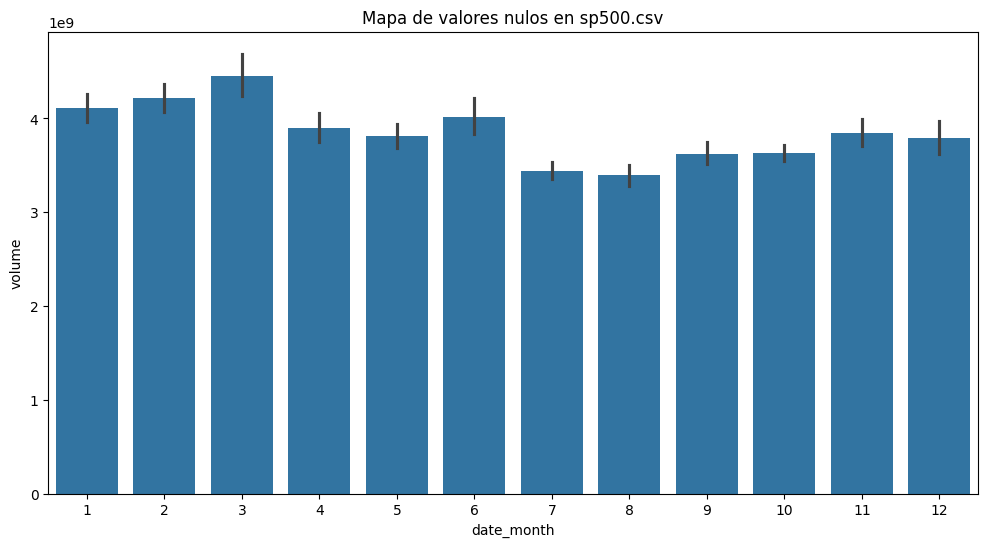

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_sp500['date_month'],y=df_sp500['volume'])
plt.title("Mapa de valores nulos en sp500.csv")

Text(0.5, 1.0, 'Mapa de valores nulos en sp500.csv')

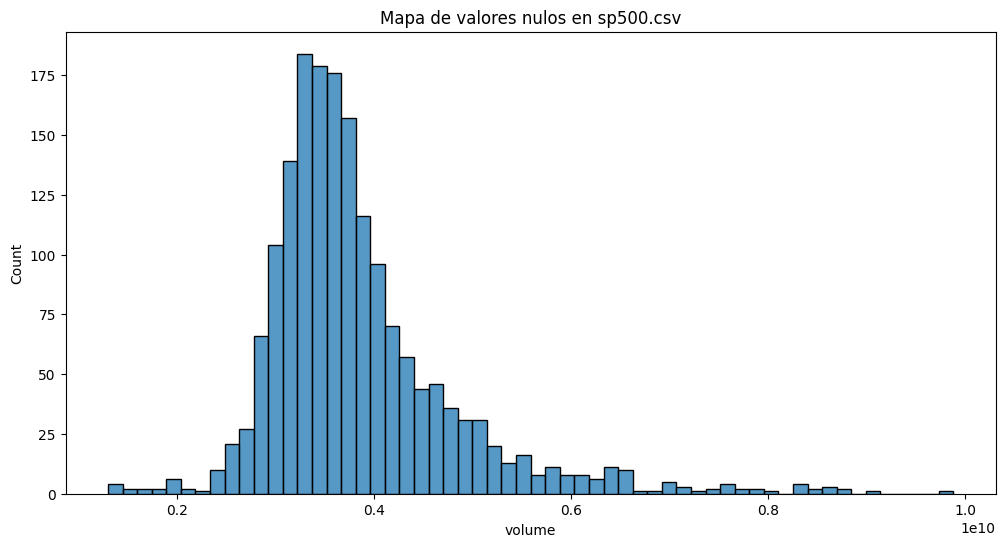

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(x=df_sp500['volume'])
plt.title("Mapa de valores nulos en sp500.csv")

Text(0.5, 1.0, 'Mapa de valores nulos en sp500.csv')

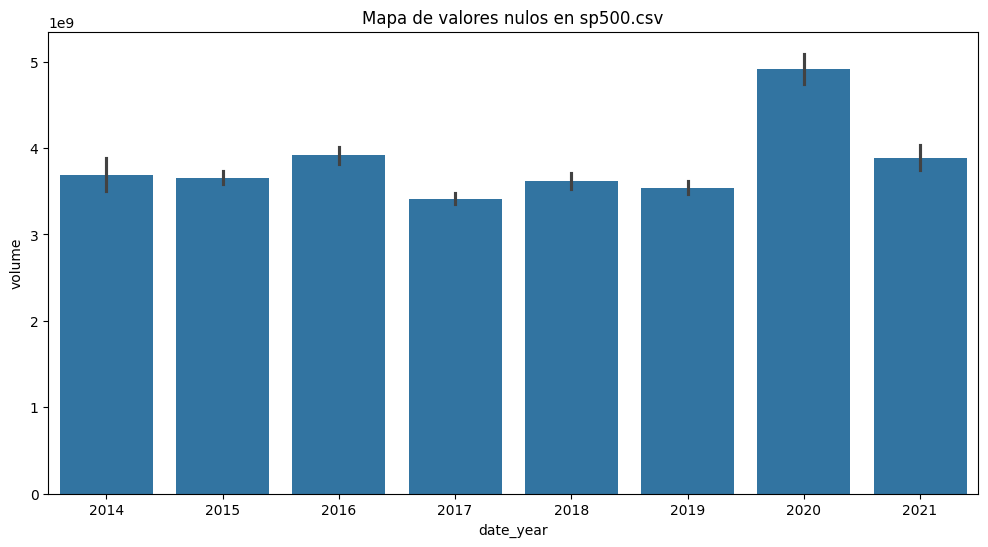

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_sp500['date_year'],y=df_sp500['volume'])
plt.title("Mapa de valores nulos en sp500.csv")